In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 50)
import tabula
from pandasql import sqldf
import math
from scipy.stats import chi2
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
DNA_inside_w = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\integrated_results_DNAinside.xlsx", sheet_name = 'weighted')
RNA_inside_w = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\integrated_results_RNAinside.xlsx", sheet_name = 'weighted')

# RNA inside

--- RNA network ---

In [3]:
rna_network = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\RNA_inside\RNA_inside_network_node.csv")
rna_network['gene'] = rna_network['name'].apply(lambda x : x.lower().capitalize())
data = RNA_inside_w.iloc[:133].copy()

In [4]:
U = 49
L = 24
cri1 = rna_network['degree.layout'] >= L
cri2 = rna_network['degree.layout'] <= U
print('inner circle: {}'.format(len(rna_network[cri1 & cri2])))
print('DTgenes involved with network:', len(set(data['gene']) & set(rna_network[cri1 & cri2].reset_index()['gene'])))

inner circle: 28
DTgenes involved with network: 14


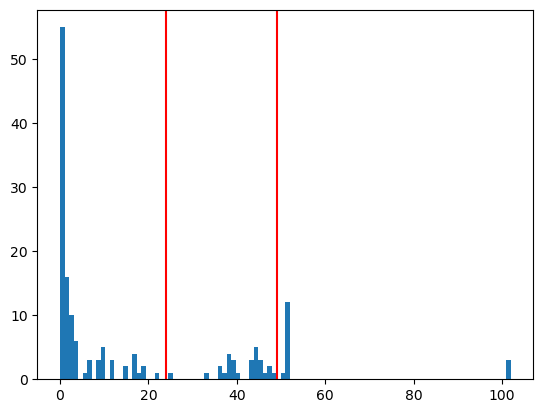

In [5]:
plt.hist(rna_network.sort_values(['degree.layout']).reset_index().drop(['index'], axis = 1)['degree.layout'], bins = 100)
plt.axvline(x = L, color = 'red')
plt.axvline(x = U, color = 'red')
plt.show()

In [6]:
df = rna_network[(rna_network['degree.layout'] >= L) & (rna_network['degree.layout'] <= U)].reset_index().drop(['index'], axis = 1)

In [7]:
# df = rna_network[rna_network['selected'] == True].reset_index().drop(['index'], axis = 1)

In [8]:
# DTgenes invovled with pw
rna_network_dt = list(set(data['gene']) & set(rna_network[cri1 & cri2].reset_index()['gene']))

--- pathway hypergeometric test ---

In [9]:
GO = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\Function\GO_terms_4899.txt", header = 0, sep = '\t')
data = RNA_inside_w.iloc[:133].copy()

C:\Users\edwar\AppData\Local\Temp\ipykernel_12608\1250122623.py:1: DtypeWarning: Columns (58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,

In [33]:
GO[GO['GO_id'] == 'GO:0015145']

,GO_id,Pathway,N.genes,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,Gene11,Gene12,Gene13,Gene14,Gene15,Gene16,Gene17,Gene18,Gene19,Gene20,Gene21,Gene22,...,Gene7830,Gene7831,Gene7832,Gene7833,Gene7834,Gene7835,Gene7836,Gene7837,Gene7838,Gene7839,Gene7840,Gene7841,Gene7842,Gene7843,Gene7844,Gene7845,Gene7846,Gene7847,Gene7848,Gene7849,Gene7850,Gene7851,Gene7852,Gene7853,Gene7854
2558,GO:0015145,monosaccharide transmembrane transporter activity,20,Glyma.01g067600,Glyma.01g238800,Glyma.02g124100,Glyma.04g014000,Glyma.07g189500,Glyma.07g086000,Glyma.08g059700,Glyma.09g190900,Glyma.11g004800,Glyma.11g016900,Glyma.10g249400,Glyma.10g249500,Glyma.11g119500,Glyma.12g037000,Glyma.12g044700,Glyma.15g098600,Glyma.16g109100,Glyma.20g144100,Glyma.20g144200,Glyma.20g144300,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
GO = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\Function\GO_terms_4899.txt", header = 0, sep = '\t')
data = RNA_inside_w.iloc[:133].copy()

# GO pathways selection (criteria no.pathways > 4 AND < 1500)
GO_v1 = GO[(GO['N.genes'] > 4) & (GO['N.genes'] < 1500)].reset_index().drop(['index'], axis = 1)

C:\Users\edwar\AppData\Local\Temp\ipykernel_23256\463601273.py:1: DtypeWarning: Columns (58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,2

In [10]:
pathways = []
for i in range(len(GO_v1['Pathway'])):
    pathway_genes = GO_v1[GO_v1['Pathway'] == GO_v1['Pathway'][i]].iloc[:, 3:3 + GO_v1['N.genes'][i]].iloc[0].values
    if len(data[data['gene'].isin(pathway_genes)]) > 0:
        pathways.append(GO_v1['Pathway'][i])
    
    if (i + 1) / 50 == 0:
        print(i + 1)

In [11]:
ttl_pw = len(pathways)
print('total pathways:', ttl_pw)

total pathways: 494


In [12]:
GO_v2 = GO_v1[GO_v1['Pathway'].isin(pathways)].reset_index().drop(['index'], axis = 1)

In [13]:
gene_list_pw = []
for i in range(len(GO_v2['Pathway'])):
    genes = GO_v2[GO_v2['Pathway'] == GO_v2['Pathway'][i]].iloc[:, 3:3 + GO_v2['N.genes'][i]].iloc[0].values
    gene_list_pw = list(gene_list_pw) + list(genes)
    gene_list_pw = set(gene_list_pw)
    
    if (i + 1) % 50 == 0:
        print(i + 1)
ttl_genes_pw = len(gene_list_pw)
print('total unique genes in pathways which have at least one DTgenes: {}'.format(ttl_genes_pw))

50
100
150
200
250
300
350
400
450
total unique genes in pathways which have at least one DTgenes: 32826


In [14]:
gene_list_dt = []
for i in range(len(GO_v2['Pathway'])):
    genes = GO_v2[GO_v2['Pathway'] == GO_v2['Pathway'][i]].iloc[:, 3:3 + GO_v2['N.genes'][i]].iloc[0].values
    dt_gene = data[data['gene'].isin(genes)].reset_index().drop(['index'], axis = 1)['gene']
    gene_list_dt = list(gene_list_dt) + list(dt_gene)
    gene_list_dt = set(gene_list_dt)
    
    if (i + 1) % 50 == 0:
        print(i + 1)

ttl_genes_dt = len(gene_list_dt)
print('total DTgenes in pathways which have at least one DTgenes: {}'.format(ttl_genes_dt))

50
100
150
200
250
300
350
400
450
total DTgenes in pathways which have at least one DTgenes: 133


In [15]:
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests
# from statsmodels import stats
p = []

for i in range(len(GO_v2['Pathway'])):
    ttl_genes_inpw = GO_v2.iloc[i]['N.genes']
    # npa 為存在在該 pw的 DT genes
    npa = pd.DataFrame(GO_v2.iloc[i].iloc[3:3 + GO_v2.iloc[i]['N.genes']]).reset_index().drop(['index'], axis = 1)
    npa.columns = ['gene']
    ttl_genes_dtin = len(npa[npa['gene'].isin(gene_list_dt)])
    
    # ttl_genes_dtin: No.DTgenes involved with genes in targeted pathway
    # ttl_genes_pw: total unique genes in all targeted pathways which include at least one DTgenes
    # ttl_genes_inpw: total genes in targeted pathway
    # ttl_genes_dt: No.DTgenes
    
    x, L, S, M = ttl_genes_dtin, ttl_genes_pw, ttl_genes_inpw, ttl_genes_dt
    p_val = hypergeom.sf(x - 1, L, S, M)
    p.append(p_val)
    p_BH = multipletests(p, alpha = 0.05, method = 'fdr_bh')[1]
    p_Bonf = multipletests(p, alpha = 0.05, method = 'bonferroni')[1]
    
    if (i + 1) % 50 == 0:
        print(i + 1)

50
100
150
200
250
300
350
400
450


In [16]:
GO_v3 = GO_v2[['GO_id', 'Pathway', 'N.genes']]
GO_v3['p'] = p
GO_v3['p_BH'] = p_BH
GO_v3['p_Bonf'] = p_Bonf

C:\Users\edwar\AppData\Local\Temp\ipykernel_23256\1294302797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GO_v3['p'] = p
C:\Users\edwar\AppData\Local\Temp\ipykernel_23256\1294302797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GO_v3['p_BH'] = p_BH
C:\Users\edwar\AppData\Local\Temp\ipykernel_23256\1294302797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [17]:
# GO_v3.to_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\RNA_hypergeom_results.xlsx", index = False)

In [18]:
# set p = 10 ** -5 as raw p threshold
pw_select = list(GO_v3[GO_v3['p'] < 10 ** -5].reset_index().drop(['index'], axis = 1)['Pathway'])
print('No.Go pathways whose p < p-value threshold: ', len(pw_select))

No.Go pathways whose p < p-value threshold:  24


In [19]:
# calculate how much DTgenes is in these 24 pathways
GO_v4 = GO_v2[GO_v2['Pathway'].isin(pw_select)].reset_index().drop(['index'], axis = 1)
gene_list_dt2 = []

for i in range(len(GO_v4['Pathway'])):
    genes = GO_v4[GO_v4['Pathway'] == GO_v4['Pathway'][i]].iloc[:, 3:3 + GO_v4['N.genes'][i]].iloc[0].values
    dt_gene = data[data['gene'].isin(genes)].reset_index().drop(['index'], axis = 1)['gene']
    gene_list_dt2 = list(gene_list_dt2) + list(dt_gene)
    gene_list_dt2 = set(gene_list_dt2)
    
    if (i + 1) % 2 == 0:
        print(i + 1)
print('{} genes involved with 24 pathways'.format(len(gene_list_dt2), len(pw_select)))

2
4
6
8
10
12
14
16
18
20
22
24
112 genes involved with 24 pathways


In [20]:
# data[data['gene'].isin(gene_list_dt2)].reset_index().rename(columns = {'index':'org_rank'}).to_excel(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\soyNet_results\dt_genes_fromPW\RNA_gene_lists.xlsx', index = False)

In [21]:
# dna_gene_list = pd.read_excel(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\soyNet_results\dt_genes_fromPW\DNA_gene_lists.xlsx')
# rna_gene_list = pd.read_excel(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\soyNet_results\dt_genes_fromPW\RNA_gene_lists.xlsx')
# len(set(dna_gene_list['gene']) & set(rna_gene_list['gene']))

In [22]:
rna_pw_network = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\RNA_insidePW\RNA_inside_PWnetwork_node.csv")
rna_pw_network['gene'] = rna_network['name'].apply(lambda x : x.lower().capitalize())

In [23]:
L = 25
U = 47
cri1 = rna_pw_network['degree.layout'] >= L
cri2 = rna_pw_network['degree.layout'] <= U
print('inner cycle: ', len(rna_pw_network[cri1 & cri2]['gene']))
print('No.DTgenes gained by significant pw:', len(set(rna_pw_network[cri1 & cri2].reset_index().drop(['index'], axis = 1)['gene']) & set(data['gene'])))

inner cycle:  33
No.DTgenes gained by significant pw: 22


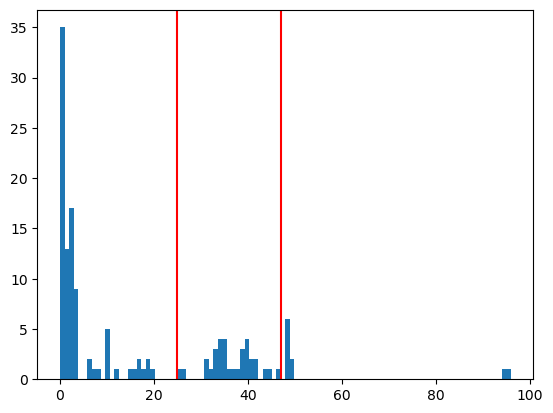

In [24]:
plt.hist(rna_pw_network.sort_values(['degree.layout']).reset_index().drop(['index'], axis = 1)['degree.layout'], bins = 100)
plt.axvline(x = U, color = 'red')
plt.axvline(x = L, color = 'red')
plt.show()

In [25]:
# DTgenes gained by significant pw
rna_network_pwdt = list(set(rna_pw_network[cri1 & cri2].reset_index().drop(['index'], axis = 1)['gene']) & set(data['gene']))

In [26]:
# Union of DTgenes gained by significant pw and DTgenes involved with network
Union_RNA = list(set(rna_network_dt) | set(rna_network_pwdt))
print('Union RNA: {}'.format(len(Union_RNA)))

Union RNA: 34


In [27]:
overlap_RNA = list(set(rna_network_dt) & set(rna_network_pwdt))
print('Overlapped RNA: {}'.format(len(overlap_RNA)))

Overlapped RNA: 2


###### summary

In [28]:
summary = pd.DataFrame()
summary['Union_RNA'] = Union_RNA
summary['RNA_dt_network'] = rna_network_dt + [np.nan for i in range(len(Union_RNA) - len(rna_network_dt))]
summary['RNA_dt_network_pw'] = rna_network_pwdt + [np.nan for i in range(len(Union_RNA) - len(rna_network_pwdt))]
summary['intersection_RNA'] = list(set(rna_network_dt) & set(rna_network_pwdt)) + [np.nan for i in range(len(Union_RNA) - len(list(set(rna_network_dt) & set(rna_network_pwdt))))]

In [29]:
all_pathways = pd.DataFrame()
all_pathways['pw_selected'] = pw_select

In [30]:
writer = pd.ExcelWriter(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\RNA_NarrowDown_summary.xlsx')
summary.to_excel(writer, sheet_name = 'gene_information', index = False)
all_pathways.to_excel(writer, sheet_name = 'selected_pw', index = False)
writer.close()